In [6]:
### First, we need to import the data set from Excel

import csv
csv_file = open('C:/Users/jerem/OneDrive/Documents/2019-XTern- Work Sample Assessment Data Science-DS.csv')

### Next, we need to create lists that contain each scooter's x-coordinate, y-coordinate, and charge level

#Initialize each list

xcoordinate = []
ycoordinate = []
charge = []

Scooter_Data = csv.reader(csv_file, delimiter=',')
next(Scooter_Data)
for row in Scooter_Data:
    for i in range(1,4):
        if row[i] == row[1]:
            xcoordinate.append(float(row[1]))
        elif row[i] == row[2]:
            ycoordinate.append(float(row[2]))
        elif row[i] == row[3]:
            charge.append(int(row[3]))

### Each scooter takes 5 hours to charge from 0 to 5. Assuming that the scooters charge at a constant rate
### (meaning it takes 1 hour to charge each scooter to its next level), the operation time cost function for each
### individual scooter is modeled as 5-n, where n represents the current charge level of each scooter.

### To determine the operation time cost for charging all of the scooters, we need to find the sum of all
### individual operation time costs

### We can create a list for each individual OTC, the sum every entry in the list to find the total
### Operation time cost
            
OTC = []

for i in range(0,25668):
    otc = 5-charge[i]
    OTC.append(otc)
    
print('The operation time cost of charging every scooter is ' + str(sum(OTC)) + ' hours.')

The operation time cost of charging every scooter is 64271 hours.


Text(0.5, 1.0, 'Scooter Locations')

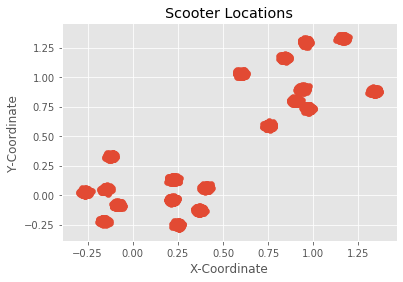

In [7]:
### To find the locations of the scooters, we need to plot each scooter's location

import matplotlib.pyplot as plt

plt.style.use('ggplot')
plt.scatter(xcoordinate, ycoordinate)
plt.xlabel('X-Coordinate')
plt.ylabel('Y-Coordinate')
plt.title('Scooter Locations')

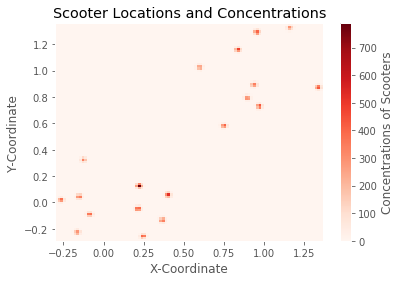

In [8]:
### Based on the appearance of this plot, the scooters are centered around 19 different locations

### A 2D histogram will help us display the concentration of scooters at each location

plt.hist2d(xcoordinate, ycoordinate, bins=100, cmap='Reds')
plt.style.use('ggplot')
plt.xlabel('X-Coordinate')
plt.ylabel('Y-Coordinate')
plt.title('Scooter Locations and Concentrations')
cb=plt.colorbar()
cb.set_label('Concentrations of Scooters')

In [9]:
### Based on the appearance of this 2D Histogram, the most popular scooter location is just west of X-coordinate
### 0.25 and just south of Y-coordinate 0.2.

### We can also determine the locations and concentrations of scooters by charge
### using 2D Histograms

zerox = []
zeroy = []
onex = []
oney = []
twox = []
twoy = []
threex = []
threey = []
fourx = []
foury = []
fivex= []
fivey = []


for i in range(0,25668):
    if charge[i] == 0:
        zerox.append(xcoordinate[i])
        zeroy.append(ycoordinate[i])
    elif charge[i] == 1:
        onex.append(xcoordinate[i])
        oney.append(ycoordinate[i])
    elif charge[i] == 2:
        twox.append(xcoordinate[i])
        twoy.append(ycoordinate[i])
    elif charge[i] == 3:
        threex.append(xcoordinate[i])
        threey.append(ycoordinate[i])
    elif charge[i] == 4:
        fourx.append(xcoordinate[i])
        foury.append(ycoordinate[i])
    else:
        fivex.append(xcoordinate[i])
        fivey.append(ycoordinate[i])

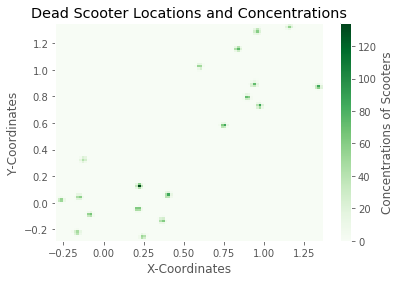

In [17]:
# For scooters with zero charge:
        
plt.hist2d(zerox, zeroy, bins=100, cmap='Greens')
plt.xlabel('X-Coordinates')
plt.ylabel('Y-Coordinates')
plt.title('Dead Scooter Locations and Concentrations')
cb2=plt.colorbar()
cb2.set_label('Concentrations of Scooters')

In [23]:
### To determine how effective the current system is, we should find the proportion
### of scooters with zero charge

deadscooters = 0

for i in range(0,25668):
    if charge[i] == 0:
        deadscooters += 1
print('The proportion of scooters that have zero charge is about ' + str(round(deadscooters/i, 5)) + '.')


The proportion of scooters that have zero charge is about 0.17096.


In [25]:
### We can also determine how many scooters of each charge level there are

Zero = 0
One = 0
Two = 0
Three = 0
Four = 0
Five = 0

for i in range(0,25668):
    if charge[i] == 0:
        Zero += 1
    elif charge[i] == 1:
        One += 1
    elif charge[i] == 2:
        Two += 1
    elif charge[i] == 3:
        Three += 1
    elif charge[i] == 4:
        Four += 1
    else:
        Five += 1

print(str(Zero) + ' scooters have a charge of 0.')
print(str(One) + ' scooters have a charge of 1.')
print(str(Two) + ' scooters have a charge of 2.')
print(str(Three) + ' scooters have a charge of 3.')
print(str(Four) + ' scooters have a charge of 4.')
print(str(Five) + ' scooters have a charge of 5.')

4388 scooters have a charge of 0.
4248 scooters have a charge of 1.
4245 scooters have a charge of 2.
4160 scooters have a charge of 3.
4284 scooters have a charge of 4.
4343 scooters have a charge of 5.


In [26]:
### The volume of a large school bus is around 45ft by 9ft by 6.5ft, or 2632.5 cubic feet
### Lime scooters are manufactured to be 39.4 inches by 11.8 inches by 15.7 inches when
### folded, or 3.28 feet by 0.98 feet by 1.31 feet for a volume of about 4.21 cubic feet
### Assuming our charging bus is the size of a large school bus, and assuming the scooters
### follow the specifications of Lime scooters, the bus can hold at most 625 scooters at
### any given moment.

In [30]:
### If we assume every 1 coordinate represents a mile, we can calculate the average 
### distance between the bus's parking location and all of the scooters as well as the
### maximum and minimum distances

import math

Distances = []

for i in range(0,25668):
    xdist = (float(20.19-xcoordinate[i]))**2
    ydist = (float(20.19-ycoordinate[i]))**2
    dist = math.sqrt(xdist+ydist)
    Distances.append(dist)
    
print('The average distance between the bus parking location and the scooters is about ' + str(round((sum(Distances)/(i+1)), 5)) + ' miles.')
print('The maximum distance between the bus parking location and a scooter is about ' + str(round(max(Distances), 5)) + ' miles.')
print('The minimum distance between the bus parking location and a scooter is about ' + str(round(min(Distances), 5)) + ' miles.')


The average distance between the bus parking location and the scooters is about 27.89713 miles.
The maximum distance between the bus parking location and a scooter is about 28.85182 miles.
The minimum distance between the bus parking location and a scooter is about 26.757 miles.


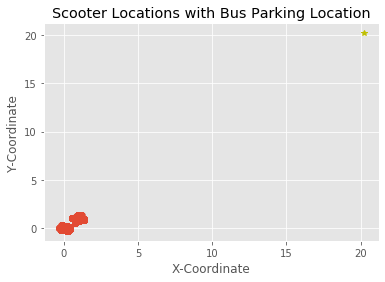

In [27]:
### The coordinates of the bus's parking location relative to the scooters can be 
### illustrated by the following scatter plot

plt.style.use('ggplot')
plt.scatter(xcoordinate, ycoordinate)
plt.xlabel('X-Coordinate')
plt.ylabel('Y-Coordinate')
plt.title('Scooter Locations with Bus Parking Location')
plt.plot(20.19, 20.19, 'y*')

In [4]:
import csv
csv_file = open('C:/Users/jerem/OneDrive/Documents/2019-XTern- Work Sample Assessment Data Science-DS.csv')

xcoordinate = []
ycoordinate = []
charge = []

Scooter_Data = csv.reader(csv_file, delimiter=',')
next(Scooter_Data)
for row in Scooter_Data:
    for i in range(1,4):
        if row[i] == row[1]:
            xcoordinate.append(float(row[1]))
        elif row[i] == row[2]:
            ycoordinate.append(float(row[2]))
        elif row[i] == row[3]:
            charge.append(int(row[3]))
            
import math

Distances = []

for i in range(0,25668):
    xdist = (float(20.19-xcoordinate[i]))**2
    ydist = (float(20.19-ycoordinate[i]))**2
    dist = math.sqrt(xdist+ydist)
    Distances.append(dist)
    
print('The average distance between the bus parking location and the scooters is about ' + str(round((sum(Distances)/(i+1)), 5)) + ' miles.')
print('The maximum distance between the bus parking location and a scooter is about ' + str(round(max(Distances), 5)) + ' miles.')
print('The minimum distance between the bus parking location and a scooter is about ' + str(round(min(Distances), 5)) + ' miles.')


The average distance between the bus parking location and the scooters is about 27.89713 miles.
The maximum distance between the bus parking location and a scooter is about 28.85182 miles.
The minimum distance between the bus parking location and a scooter is about 26.757 miles.


In [5]:
### According to gaspricewatch.com, the average price for one gallon of diesel fuel
### is $2.84. Large buses like our megabus can hold up to 100 gallons of fuel,
### according to reference.com. This means that a full tank of gas, on average,
### will cost us $284. According to truecostblog.com, buses average around 6.1 miles
### per gallon on diesel fuel. On a full tank of gas, which costs $284, our bus can
### travel around 610 miles. Therefore, we should expect it to cost the bus around
### 47 cents to travel one mile.

### The bus will travel, on average, around 56 miles to and from the parking location.
### As the number of stops increases, the number of total miles traveled by the bus
### will also increase.
        
### To save time, we can use an eyeball estimate for the 19 scooter locations

Text(0.5, 1.0, 'Scooter Locations')

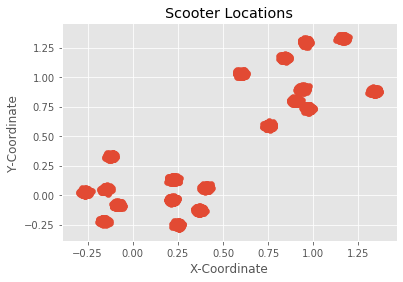

In [7]:
import matplotlib.pyplot as plt

plt.style.use('ggplot')
plt.scatter(xcoordinate, ycoordinate)
plt.xlabel('X-Coordinate')
plt.ylabel('Y-Coordinate')
plt.title('Scooter Locations')

In [8]:
locx = [-0.25, -0.15, -0.12, -0.15, -0.10, 0.22, 0.22, 0.25, 0.35, 0.40, 0.60, 0.75, 0.85, 0.95, 0.9, 0.95, 0.95, 1.15, 1.35]
locy = [0.05, -0.20, 0.35, 0.05, -0.10, 0.13, -0.05, -0.25, -0.13, 0.10, 1.05, 0.60, 1.15, 0.90, 0.80, 0.75, 1.30, 1.35, 0.9]
location_distances = []
distances = 0

for i in range(0,19):
    distances += i
    for j in range(0,19):
        if i != j:
            xdist = (xcoordinate[i] - xcoordinate[j])**2
            ydist = (ycoordinate[i] - ycoordinate[j])**2
            dist = math.sqrt(xdist+ydist)
            location_distances.append(dist)
            
print('The average distance between two scooter locations is about ' + str(round(((sum(location_distances))/(distances)), 5)) + ' miles.')
             

The average distance between two scooter locations is about 0.04255 miles.


In [9]:
def cost(stops): 
    gas_cost = 0.47*((56)+(stops-1)*(0.04255))
    print('The cost of a trip where the bus makes ' + str(stops) + ' stops is $' + str(round(gas_cost,2)) + '.')
    

In [10]:
cost(1)

The cost of a trip where the bus makes 1 stops is $26.32.


In [11]:
cost(19)

The cost of a trip where the bus makes 19 stops is $26.68.


In [12]:
### Over the course of one year, if we give the bus 6 hours to load the scooters,
### charge them, and drop them off, the bus will make 1460 trips per year if the
### bus runs continuously. If the bus only makes one stop per trip, the yearly gas
### cost for the bus will be $38,472.20. If the bus makes the maximum 19 stops per
### trip, the yearly gas cost for the bus will be $38,952.80. The company
### would only save about $500 per year, so minimizing the number of stops isn't
### particularly important to developing an efficient stratetegy.

### On average, the yearly gas cost for the bus is about $38,712.50

### Based on these assumptions, we can estimate the profit over the course of a
### year for different amounts of scooters that can be charged at once.

### Lime scooters average 5.5 trips per day for an average daily revenue of $16, or
### 67 cents per hour. A fully charged Lime scooter can travel up to 20 miles
### before losing charge. According to the Indianapolis Star, scooters are used 
### on average around an hour per day and travel for around 4 miles. Therefore, 
### assuming the scooters don't lose charge while dormant, a fully charged scooter 
### takes 5 days, or 60 hours, to lose its charge. If the charge of our scooters 
### ranges from 0 to 5, we should expect the average scooter to fall one charge 
### level every 12 hours.
    
### According to trackschoolbus.com, the dimensions of a large school bus are 
### 11 feet by 8 feet by 40 feet. If our bus conforms to these specifications,
### it can hold about 3520 cubic feet.
    
### A Lime scooter when folded is 39.4 inches by 11.8 inches by 15.7 inches.
### If our scooters conform to these specificatons, they have a volume of about
### 4.22 cubic feet.
    
### Based on these assumptions, our bus can hold about 834 scooters.

In [16]:
### Assuming each scooter is at its charge level precisely, this function
### will display total profits over a given time period as the number of buses 
### used changes.
    
def profit(time, buses):
    hoursleft = []
    total_revenue = 0
    total_cost = 0
    usable_scooters = 0
    unusable_scooters = 0
    for i in range(0,25668):
        hours = 12*charge[i]
        hoursleft.append(hours)
    charging_scooters = 0
    for t in range(0,time):
        if t%6 == 0:
            charging_scooters = 0
        for i in range(0,25668):
            if t != 0:
                if hoursleft[i] == 0:
                    if t%6 == 0:
                        if charging_scooters < buses*(834):
                            hoursleft[i] += 60
                            charging_scooters += 1
                elif hoursleft[i] != 0:
                    hoursleft[i] -= 1
            else:
                if hoursleft[i] != 0:
                    hoursleft[i] -= 1
        for i in range(0,25668):
            if hoursleft[i] != 0:
                total_revenue = total_revenue + 0.67
    for i in range(0,25668):
        if hoursleft[i] == 0:
            unusable_scooters += 1
            
    total_cost = time*buses*(38712.5/8160)
        
    total_profit = total_revenue-total_cost
    
    usable_scooters = 25668 - unusable_scooters - charging_scooters
    
    print('The total profit for trying to collect ' + str(buses*834) + ' scooters at a time for ' + str(round(time/8760, 2)) + ' years is about $' + str(round(total_profit, 2)) + '.')
    print('After ' + str(round(time/8760, 2)) + ' years, ' + str(round(100*usable_scooters/(25668-charging_scooters), 2)) + '% of scooters on the street are usable.')
    print('There are ' + str(25668-charging_scooters) + ' scooters on the street.')
    

In [17]:
profit(43801, 1)

The total profit for trying to collect 834 scooters at a time for 5.0 years is about $244859885.92.
After 5.0 years, 30.22% of scooters on the street are usable.
There are 24834 scooters on the street.


In [18]:
profit(43801, 2)

The total profit for trying to collect 1668 scooters at a time for 5.0 years is about $489218921.59.
After 5.0 years, 62.55% of scooters on the street are usable.
There are 24000 scooters on the street.


In [19]:
profit(43801, 3)

The total profit for trying to collect 2502 scooters at a time for 5.0 years is about $684173647.39.
After 5.0 years, 89.42% of scooters on the street are usable.
There are 23639 scooters on the street.


In [20]:
profit(43801, 4)

The total profit for trying to collect 3336 scooters at a time for 5.0 years is about $684000825.63.
After 5.0 years, 86.57% of scooters on the street are usable.
There are 24844 scooters on the street.


In [21]:
profit(43801, 5)

The total profit for trying to collect 4170 scooters at a time for 5.0 years is about $683815895.63.
After 5.0 years, 83.75% of scooters on the street are usable.
There are 25668 scooters on the street.


In [22]:
### Time variable is measured by hours

In [23]:
########## SUMMARY ##########

### Assumptions:
# Each scooter charges at a constant rate
# Every one coordinate represents one mile
# Our scooters conform to the same specifications as Lime scooters
# Scooters don't lose their charge if left unused
# Each scooter is precisely at each charge level
# Diesel prices remain constant
# Bus averages 6.1 miles per gallon
# The only operational cost is paying for gas
# Scooters are loaded, charged, and dropped off in exactly 6 hours 

### Conclusion:

### Based on my assumptions and the observations I've made in the data, the
### company should strongly consider adding two more buses to the operation.
### In using 3 buses, the company maximizes both profit and the percentage
### of scooters on the street that are usable.
    